<a href="https://colab.research.google.com/github/TrushaT/Data-Science-/blob/main/DS_Exp6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Name: Trusha Talati

#### UID: 2018130054

## Exp 6] Time Series Analysis


### Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive #mounting google drive which contains the dataset 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/DS

/content/drive/MyDrive/DS


In [4]:
%pwd # checking the present directory which contains the dataset

'/content/drive/MyDrive/DS'

In [5]:
df = pd.read_csv('AirPassengers.csv')

This dataset consists of records of the number of passenger that travelled on a US airline for a range of years. In this dataset, there is a column called Month in which the dates are formatted as year–month.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


We can see from head() and tail() functions that the records start from 1949 and go on till the year 1960. Hence, this dataset is a good fit for employing various time series analysis techniques.

### Preprocessing

In [9]:
df.rename(columns = {'#Passengers':'Passengers'}, inplace = True)

In [10]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [11]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m') # To convert month column to date time object

In [12]:
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


We need to convert the time values into a format that is "Month, Year"

In [13]:
df['Month-Year'] = df['Month'].dt.strftime('%b')
for i in range(144):
    df['Month-Year'][i] = df['Month-Year'][i] + ", " +str(df['Month'][i].year)
df['Month-Year']

0      Jan, 1949
1      Feb, 1949
2      Mar, 1949
3      Apr, 1949
4      May, 1949
         ...    
139    Aug, 1960
140    Sep, 1960
141    Oct, 1960
142    Nov, 1960
143    Dec, 1960
Name: Month-Year, Length: 144, dtype: object

To perform time series analysis month column needs to be converted to an index.

In [14]:
df.index = df['Month']
del df['Month'] # Deleting the month column as it has been converted to Index

In [15]:
df.head()

,Passengers,Month-Year
Month,,
1949-01-01,112,"Jan, 1949"
1949-02-01,118,"Feb, 1949"
1949-03-01,132,"Mar, 1949"
1949-04-01,129,"Apr, 1949"
1949-05-01,121,"May, 1949"


### Time Series Analysis

Text(0.5, 0, 'Time(year)')

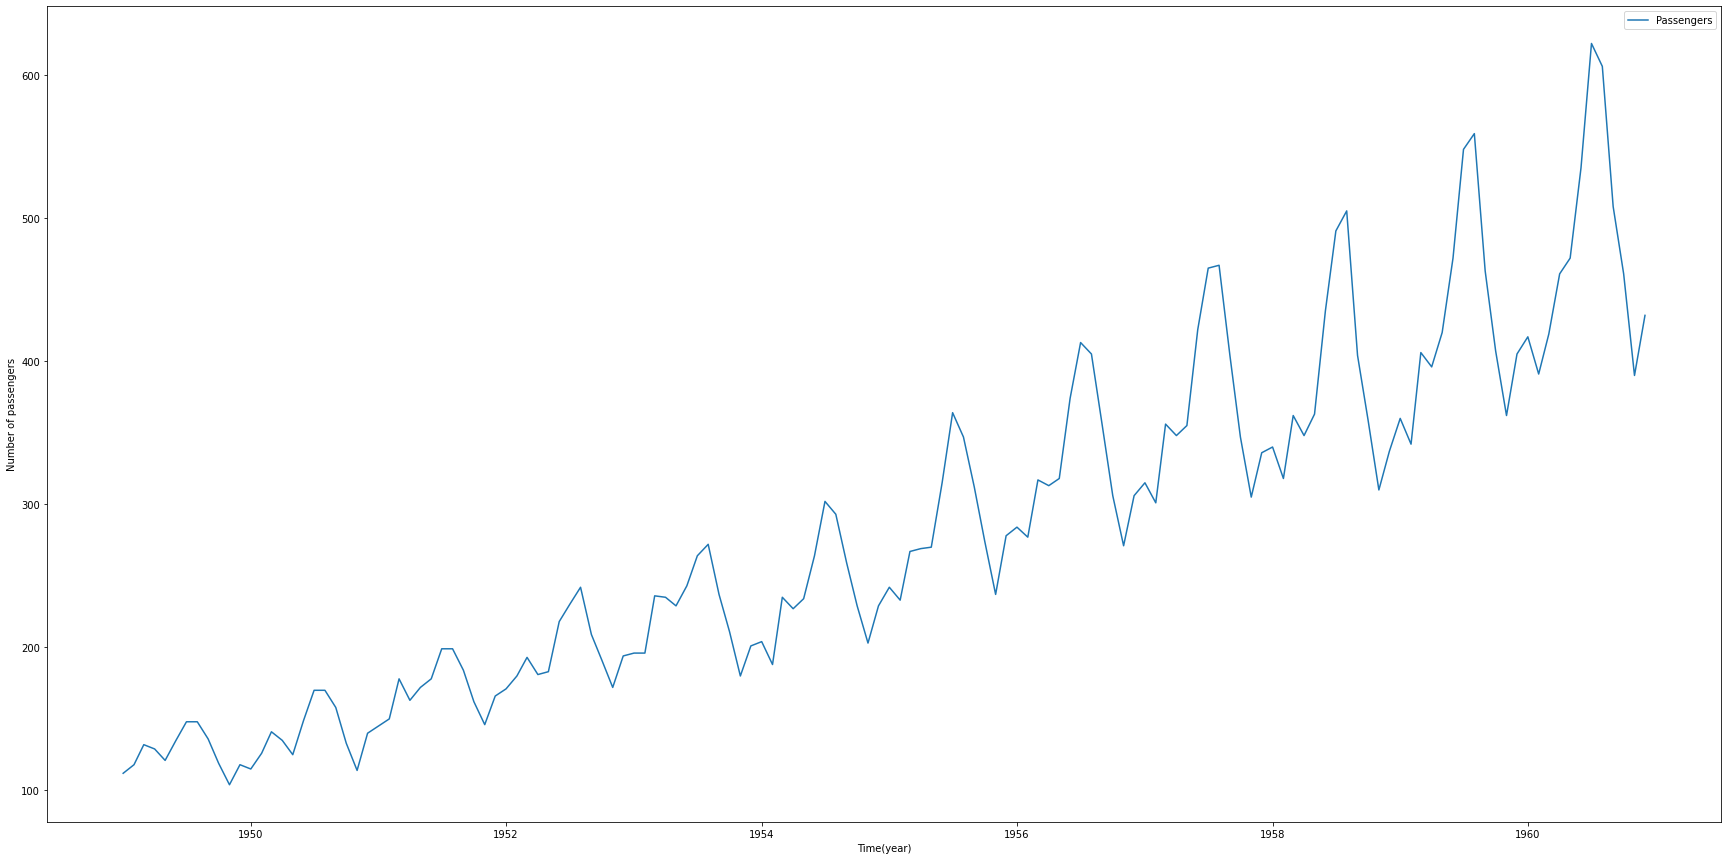

In [16]:
plt.figure(figsize=(30,15))
sns.lineplot(data=df)
plt.ylabel("Number of passengers")
plt.xlabel("Time(year)")

I can see that as the years went by, the number of passengers increased in a general sense. However, there is a significant pattern of consecutive increment and decrement between two time periods which repeats itself in this general increase of number of passengers.

Text(0, 0.5, 'Number of passengers')

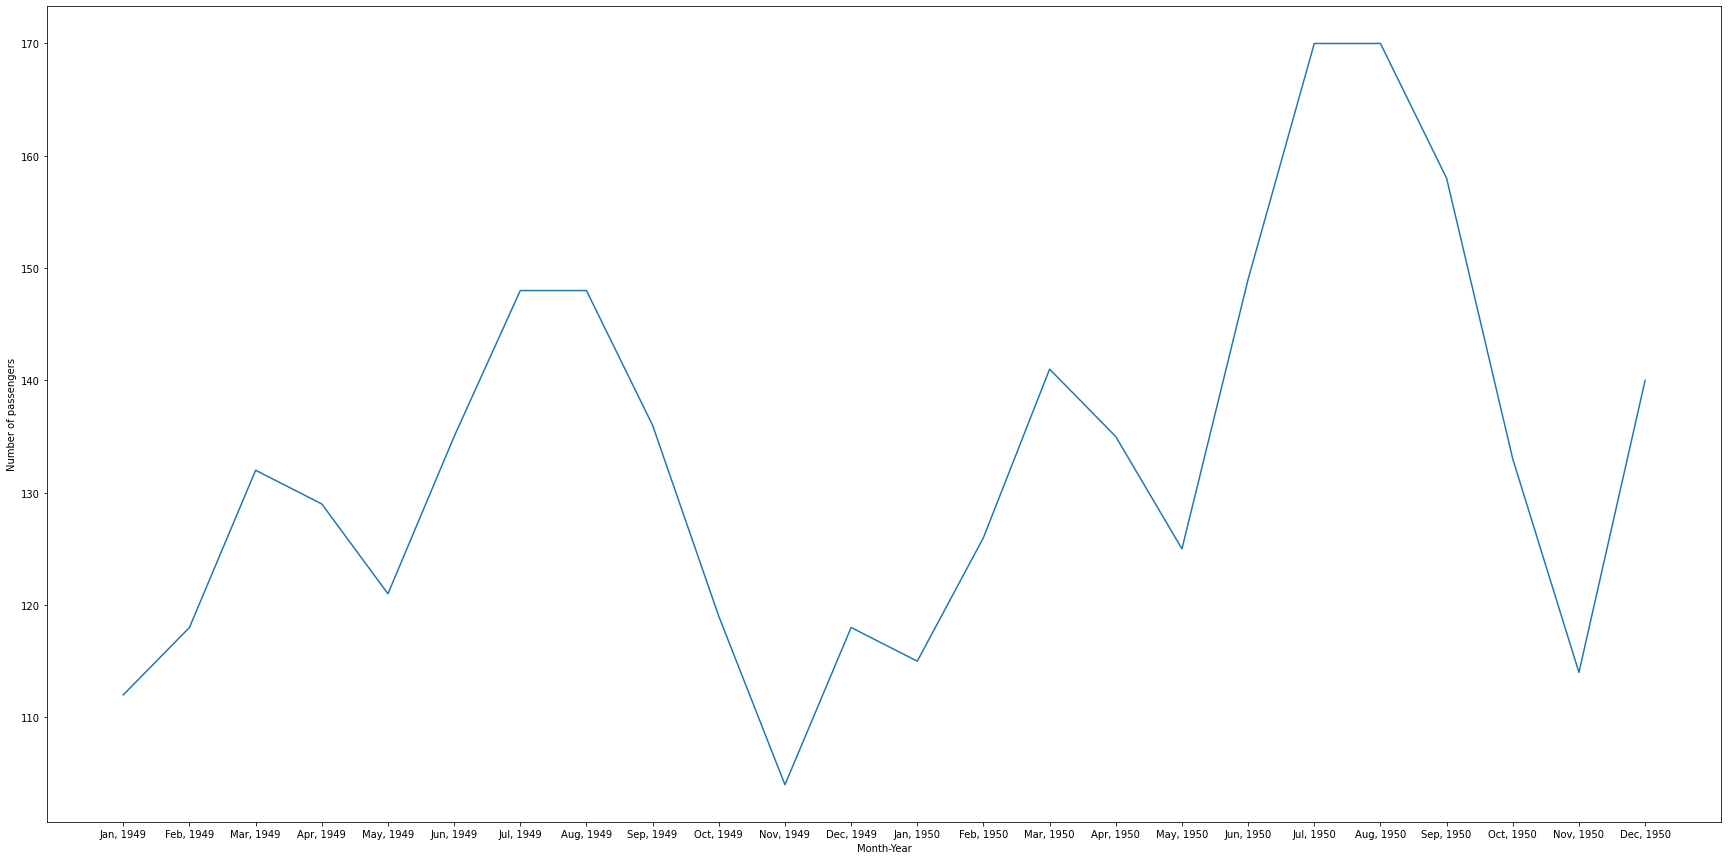

In [17]:
plt.figure(figsize=(30,15))
sns.lineplot(x=df['Month-Year'][:24],y = df['Passengers'][:24], data=df)
plt.ylabel("Number of passengers")

Text(0, 0.5, 'Number of passengers')

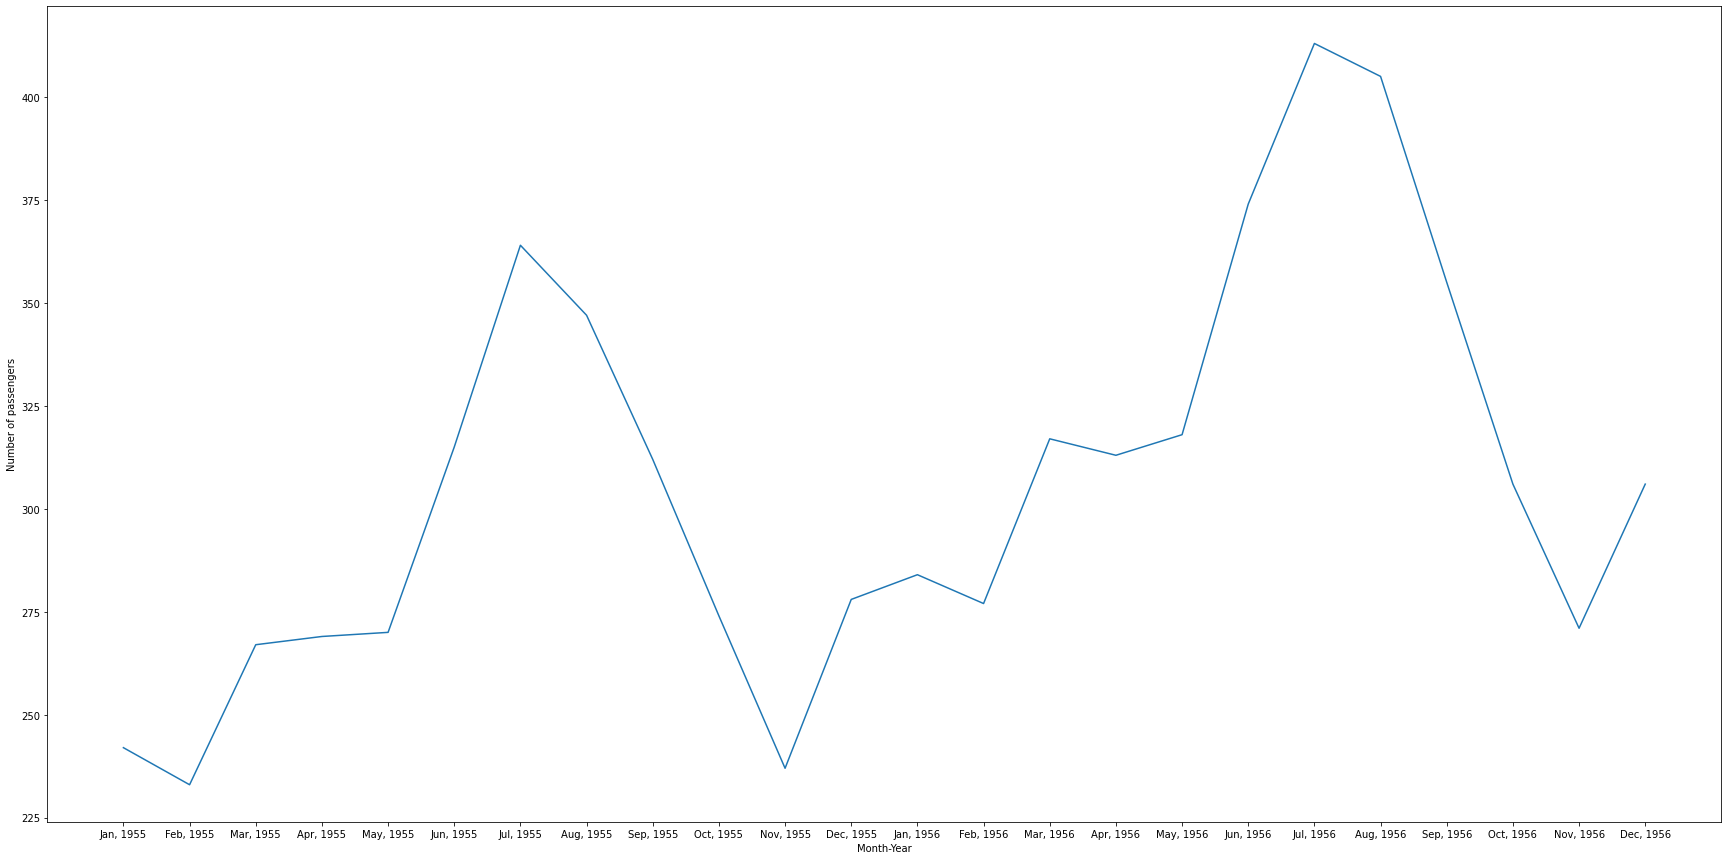

In [18]:
plt.figure(figsize=(30,15))
sns.lineplot(x=df['Month-Year'][72:96],y = df['Passengers'][72:96], data=df)
plt.ylabel("Number of passengers")

Text(0, 0.5, 'Number of passengers')

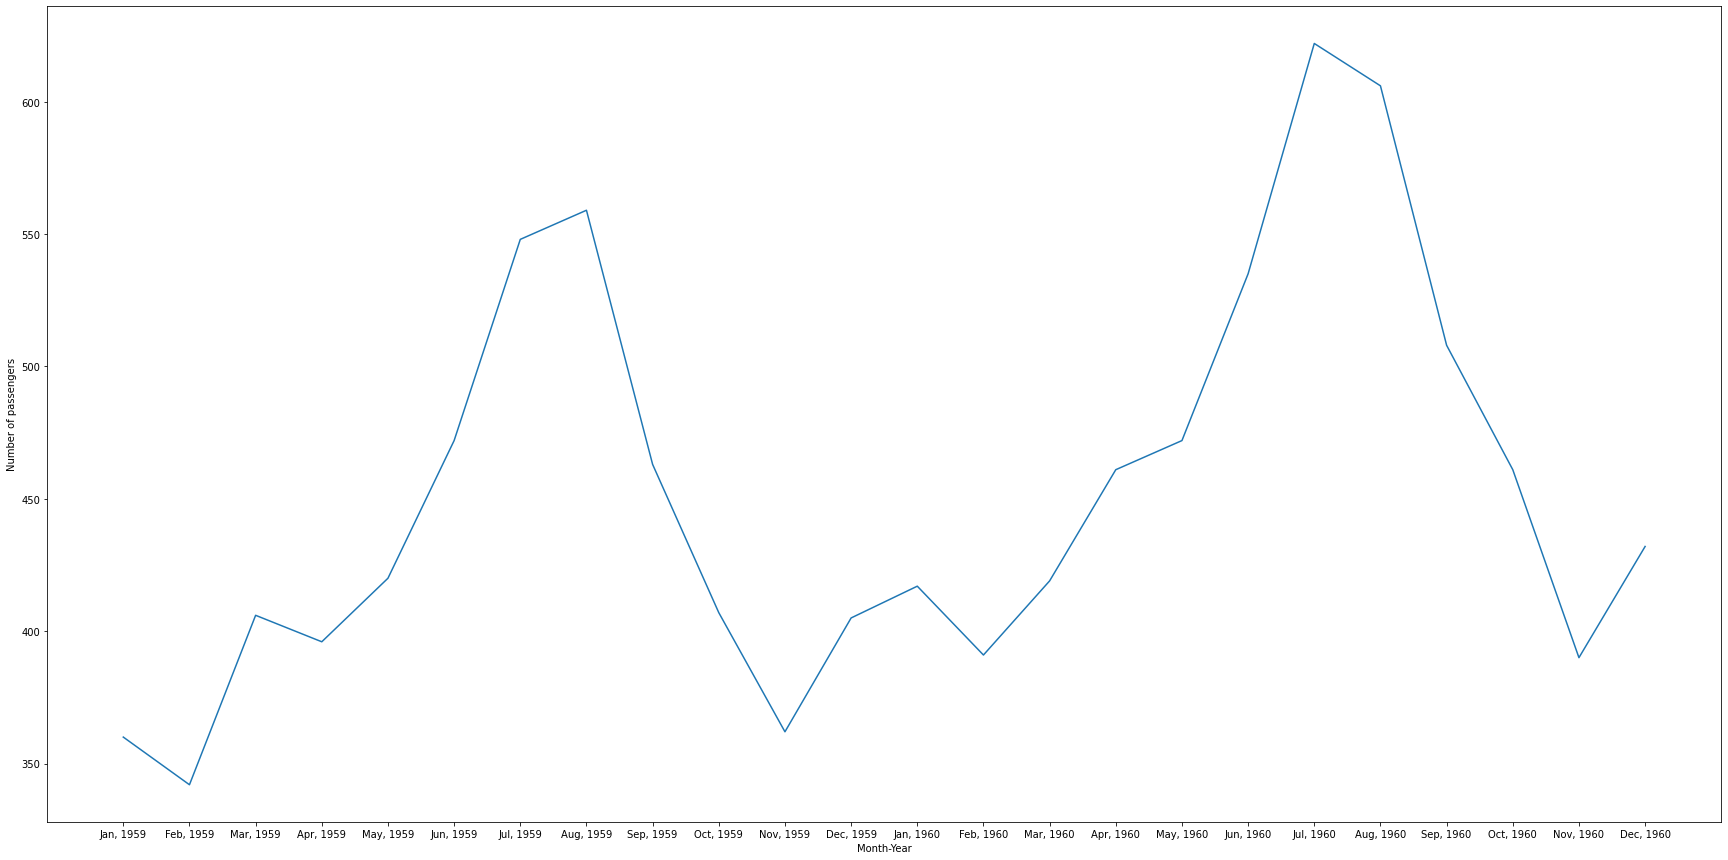

In [19]:
plt.figure(figsize=(30,15))
sns.lineplot(x=df['Month-Year'][120:144],y = df['Passengers'][120:144], data=df)
plt.ylabel("Number of passengers")

The above three graphs are three segments of the entire dataset. From the three graphs I infer that air travel becomes low in the month of November and high between July and September months. Further, it represents a seasonal trend in the data.

In [20]:
df.drop('Month-Year', inplace=True, axis=1) # Removing the Month-Year column

#### Rolling Mean and Rolling Standard Deviation

In [21]:
df.rolling(7).mean().tail() # Calculating the rolling average for 7 days window (i.e. one week)

,Passengers
Month,
1960-08-01,500.857143
1960-09-01,517.571429
1960-10-01,523.571429
1960-11-01,513.428571
1960-12-01,507.714286


In [22]:
rolling_mean = df.rolling(7).mean()
rolling_std = df.rolling(7).std()

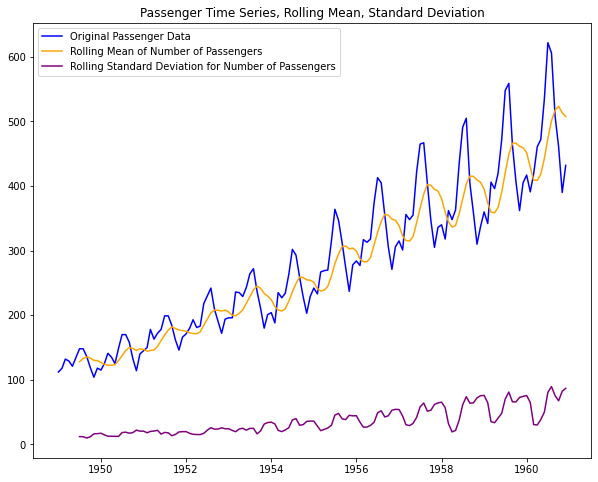

In [23]:
plt.figure(figsize=(10,8))
plt.plot(df, color="blue",label="Original Passenger Data")
plt.plot(rolling_mean, color="orange", label="Rolling Mean of Number of Passengers")
plt.plot(rolling_std, color="purple", label = "Rolling Standard Deviation for Number of Passengers")
plt.title("Passenger Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc='best')

Once again, the pattern is somewhat visible for rolling mean and rolling standard deviation indicating the seasonal trend in data.

#### Stationarity in Time Series - Checking whether given data is Stationary

Stationarity in time series indicates that the manner in which time series data changes is constant. A stationary time series will not have any trends or seasonal patterns. In the most intuitive sense, stationarity means that the statistical properties of a process generating a time series do not change over time. It does not mean that the series does not change over time, just that the way it changes does not itself change over time.

##### Dickey Fuller test to check for stationarity

In [24]:
# ! pip install --upgrade Cython
# ! pip install --upgrade git+https://github.com/statsmodels/statsmodels

In [25]:
# !pip install --user scipy==1.2.0

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [27]:
adft = adfuller(df['Passengers'], autolag="AIC")
# Method to use when automatically determining the lag length among the values 0, 1, …, maxlag.
# If "AIC" (default) or "BIC", then the number of lags is chosen to minimize the corresponding information criterion.

In [28]:
output_df = pd.DataFrame(
    {'Metric':
     ['Test Statistics','p-value','No. of lags used','Number of observations used',
'critical value (1%)', 'critical value (5%)', 'critical value (10%)'],
    'Values':[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]
    }
)
print(output_df)

                        Metric      Values
0              Test Statistics    0.815369
1                      p-value    0.991880
2             No. of lags used   13.000000
3  Number of observations used  130.000000
4          critical value (1%)   -3.481682
5          critical value (5%)   -2.884042
6         critical value (10%)   -2.578770


The p-value is greater than 5 percent and the test statistic is greater than the critical value, hence the given time series is not stationary. This analysis confirms my observation of an increasing trend in the number of passengers as seen in the various graphs drawn earlier.

#### Autocorrelation

Autocorrelation is a measure of how correlated time series data is at a given point in time with past values. If the number of passengers data has strong autocorrelation, we can say that today's high passenger numbers suggest a strong possibility that tomorrow's number of passengers will be high too.

We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

In [29]:
autocorrelation_lag1 = df['Passengers'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

One Month Lag:  0.9601946480498523


In [30]:
autocorrelation_lag3 = df['Passengers'].autocorr(lag=3)
print('Three Month Lag: ', autocorrelation_lag3)
autocorrelation_lag6 = df['Passengers'].autocorr(lag=6)
print('Six Month Lag: ', autocorrelation_lag6)
autocorrelation_lag9 = df['Passengers'].autocorr(lag=9)
print('Nine Month Lag: ', autocorrelation_lag9)

Three Month Lag:  0.837394765081794
Six Month Lag:  0.7839187959206183
Nine Month Lag:  0.8278519011167601


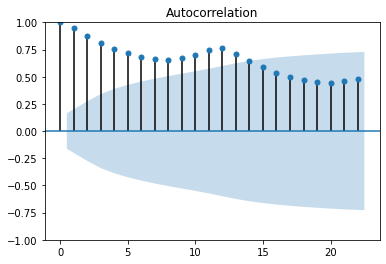

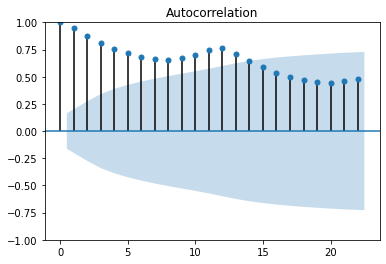

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df)

The 2D plot shows the lag value along the x-axis and the correlation on the y-axis between -1 and 1. This plot, the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. One month lag autocorelation is the highest for the given data.

#### Seasonal Decomposition

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

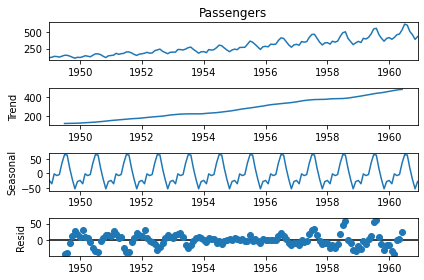

In [33]:
decompose = seasonal_decompose(df['Passengers'],model='additive')
decompose.plot()
plt.show()

From this plot (Seasonal decomposition using moving averages), the increasing trend in number of passengers and the seasonality patterns in the rise and fall in values each year is clearly visible.

Trend: The linear increasing or decreasing behavior of the series over time.

Seasonality: The repeating patterns or cycles of behavior over time.

Residuals: The "residuals"in a time series model are what is left over after fitting a model. For many (but not all) time series models, the residuals are equal to the difference between the observations and the corresponding fitted values.

#### Forecasting

In [34]:
from datetime import datetime

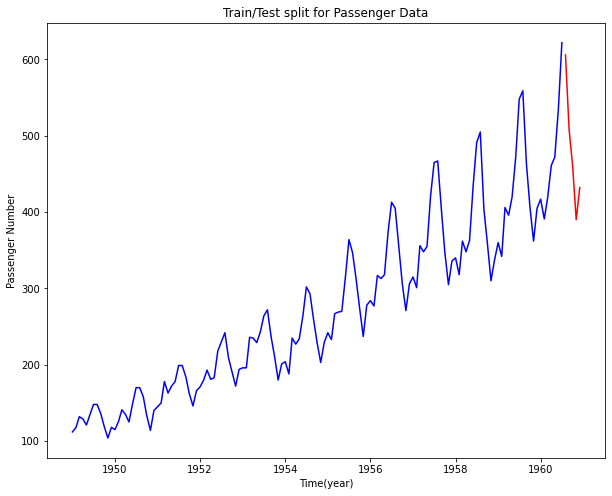

In [35]:
plt.figure(figsize=(10,8))
df['Date'] = df.index
train = df[df['Date'] < datetime.strptime('1960-08-01','%Y-%m-%d')]
train['train'] = train['Passengers']
del train['Date']
del train['Passengers']
test = df[df['Date'] >= datetime.strptime('1960-08-01','%Y-%m-%d')]
del test['Date']
test['test'] = test['Passengers']
del test['Passengers']
plt.plot(train, color = 'blue')
plt.plot(test, color = 'red')
plt.title('Train/Test split for Passenger Data')
plt.ylabel('Passenger Number')
plt.xlabel('Time(year)')
sns.set()
plt.show()

##### Using Auto ARIMA (autoregressive integrated moving average) Model

An autoregressive integrated moving average model is a generalization of an autoregressive moving average model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series.

In [36]:
# !pip install pmdarima

In [37]:
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1352.593, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1340.702, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1336.259, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1352.415, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1329.986, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1335.098, Time=0.40 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1336.923, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1329.407, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1335.407, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1339.796, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1325.560, Time=0.37 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1336.3

In [38]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print('RMSE: ', rms)

RMSE:  61.36470008138933


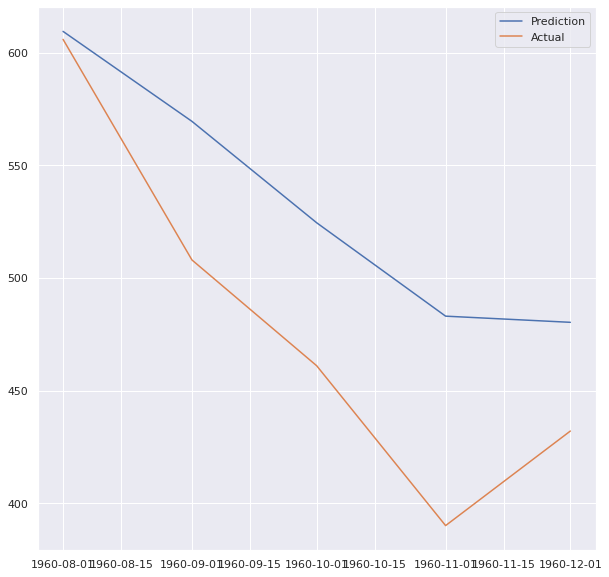

In [39]:
plt.figure(figsize=(10,10))
plt.plot(test.index, forecast['Prediction'], label = "Prediction")
plt.plot(test.index, test['test'], label = "Actual")
plt.legend()
plt.show()

### Conclusion
- In this experiment, I performed time series analysis and forecasting on US airline passenger dataset and learnt about seasonality, trends, residuals etc.
- With the help of numerous graphs, I analyzed the data and inferred the data was indeed seasonal and not stationary. The Dickey Fuller test certainly confirmed the same for me.
- The data had an increasing trend i.e. as the year number increased the number of passengers travelling on that US airline also increased. The data was seasonal owing to several factors related to travel which is intuitive as we all know that most peope travel during summer vacations or during the winter break.
- I also applied forecasting model called Auto ARIMA in order to predict the time series values and observed a RMSE of 61.36 number of passengers.